In [1]:
import numpy
import pandas
from matplotlib import pyplot
from scipy.stats import norm, binom, beta
import math
import json

In [2]:
class ThomsonSamplingPolicy():
    def __init__(self):
        self.ads = [
            {
                'name': 'A',
                'n_suc': 0,
                'n':1,
                'p': 0,
                'alpha': 1,
                'beta': 1
            },
            {
                'name': 'B',
                'n_suc': 0,
                'n':1,
                'p': 0,
                'alpha': 1,
                'beta': 1
            },
            {
                'name': 'C',
                'n_suc': 0,
                'n':1,
                'p': 0,
                'alpha': 1,
                'beta': 1
            },
            
        ]
        self.total_n = 1
        
    def get_action(self):
        return numpy.argmax([numpy.random.beta(ad['alpha'], ad['beta']) for ad in self.ads])

    def update(self, action, reward):
        self.ads[action]['n_suc'] += reward
        self.ads[action]['n'] += 1
        self.ads[action]['alpha'] = self.ads[action]['alpha'] + reward
        self.ads[action]['beta'] = self.ads[action]['beta'] + 1 - reward
        self.ads[action]['p'] = self.ads[action]['n_suc'] / self.ads[action]['n']
        self.total_n += 1

class Agent():
    def __init__(self, policy):
        self.policy = policy

    def get_action(self):
        return self.policy.get_action()

    def update(self, action, reward):
        self.policy.update(action, reward)

class Environment():
    def __init__(self):
        self.hidden_probs = [8/1000, 4/1000, 1/10000]

    def perform(self, action):
        return int(numpy.random.rand() < self.hidden_probs[action])

class Experiment():
    def __init__(self, environment, agent):
        self.environment = environment
        self.agent = agent
        
    def run_trails(self, n):
        for ni in range(n):
            action = self.agent.get_action()
            reward = self.environment.perform(action)
            self.agent.update(action, reward)

    def plot_policy(self):
        policy = self.agent.policy
        print('total n', policy.total_n)
        print(json.dumps(policy.ads, indent=2))
        
        x_ax = numpy.linspace(0, 0.05, 1000)
        pyplot.figure(figsize=(9,6))
        for ad in policy.ads:
            label='Ad ' + ad['name']
            pyplot.plot(x_ax, beta.pdf(x_ax, ad['alpha'], ad['beta']), label=label)

        pyplot.legend()
        pyplot.show()

In [3]:
policy = ThomsonSamplingPolicy()
agent = Agent(policy)
environment = Environment()
experiment = Experiment(environment, agent)

n_trails 10
total n 11
[
  {
    "name": "A",
    "n_suc": 0,
    "n": 3,
    "p": 0.0,
    "alpha": 1,
    "beta": 3
  },
  {
    "name": "B",
    "n_suc": 0,
    "n": 5,
    "p": 0.0,
    "alpha": 1,
    "beta": 5
  },
  {
    "name": "C",
    "n_suc": 0,
    "n": 5,
    "p": 0.0,
    "alpha": 1,
    "beta": 5
  }
]


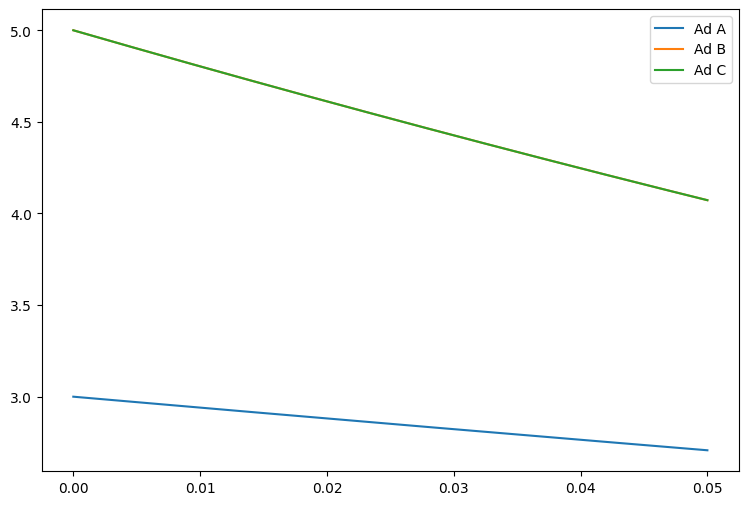

Press Enter to continue... 


n_trails 20
total n 31
[
  {
    "name": "A",
    "n_suc": 0,
    "n": 10,
    "p": 0.0,
    "alpha": 1,
    "beta": 10
  },
  {
    "name": "B",
    "n_suc": 0,
    "n": 13,
    "p": 0.0,
    "alpha": 1,
    "beta": 13
  },
  {
    "name": "C",
    "n_suc": 0,
    "n": 10,
    "p": 0.0,
    "alpha": 1,
    "beta": 10
  }
]


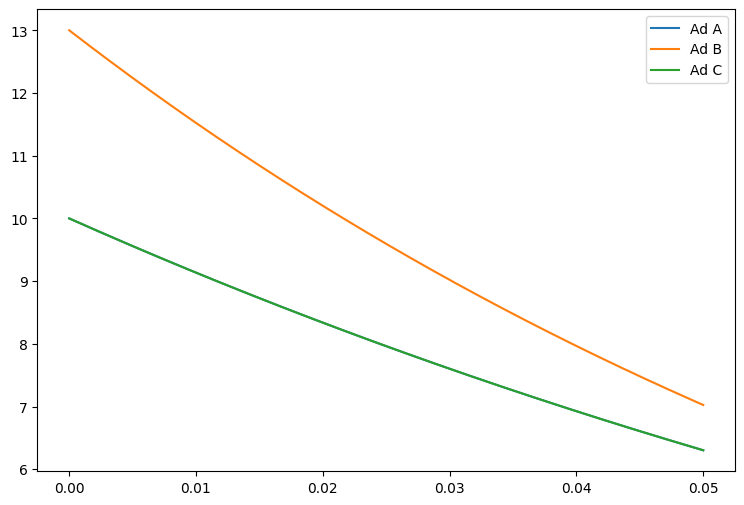

Press Enter to continue... 


n_trails 50
total n 81
[
  {
    "name": "A",
    "n_suc": 0,
    "n": 29,
    "p": 0.0,
    "alpha": 1,
    "beta": 29
  },
  {
    "name": "B",
    "n_suc": 0,
    "n": 28,
    "p": 0.0,
    "alpha": 1,
    "beta": 28
  },
  {
    "name": "C",
    "n_suc": 0,
    "n": 26,
    "p": 0.0,
    "alpha": 1,
    "beta": 26
  }
]


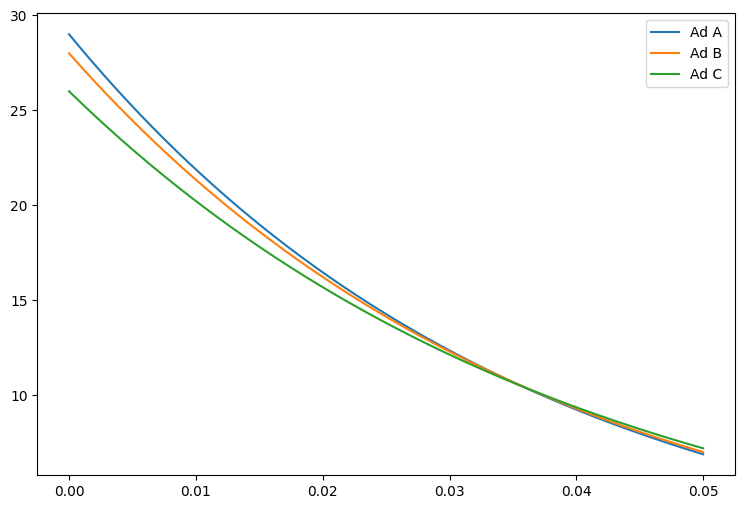

Press Enter to continue... 


n_trails 100
total n 181
[
  {
    "name": "A",
    "n_suc": 0,
    "n": 50,
    "p": 0.0,
    "alpha": 1,
    "beta": 50
  },
  {
    "name": "B",
    "n_suc": 2,
    "n": 85,
    "p": 0.023529411764705882,
    "alpha": 3,
    "beta": 83
  },
  {
    "name": "C",
    "n_suc": 0,
    "n": 48,
    "p": 0.0,
    "alpha": 1,
    "beta": 48
  }
]


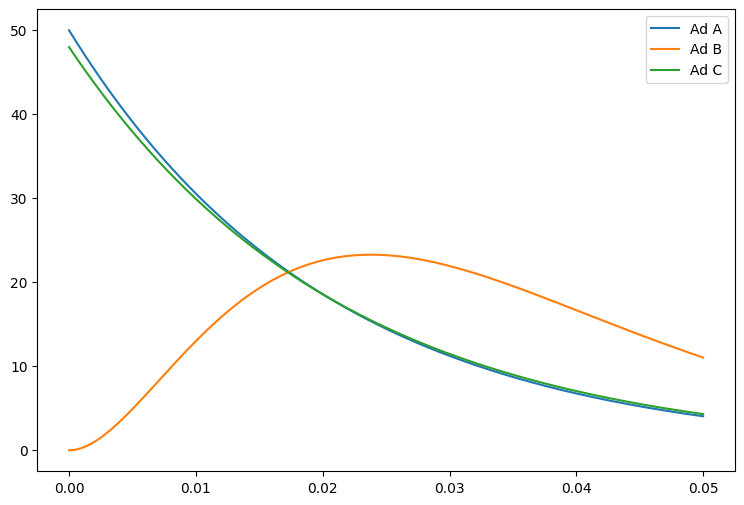

Press Enter to continue... 


n_trails 200
total n 381
[
  {
    "name": "A",
    "n_suc": 2,
    "n": 125,
    "p": 0.016,
    "alpha": 3,
    "beta": 123
  },
  {
    "name": "B",
    "n_suc": 4,
    "n": 178,
    "p": 0.02247191011235955,
    "alpha": 5,
    "beta": 174
  },
  {
    "name": "C",
    "n_suc": 0,
    "n": 80,
    "p": 0.0,
    "alpha": 1,
    "beta": 80
  }
]


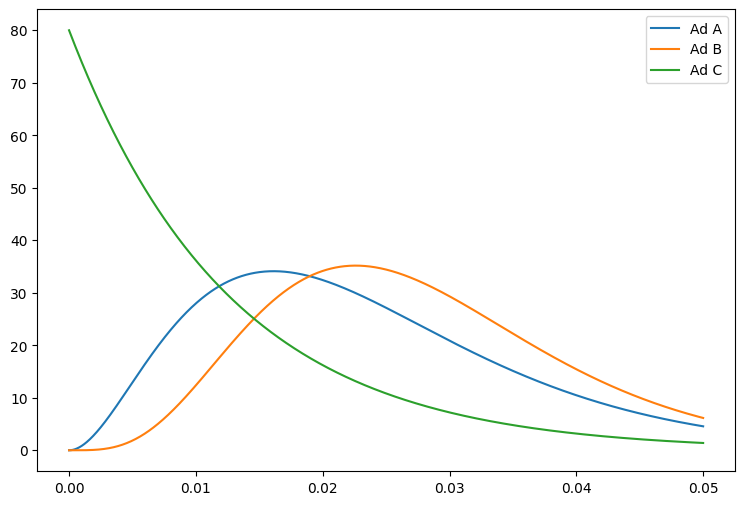

Press Enter to continue... 


n_trails 500
total n 881
[
  {
    "name": "A",
    "n_suc": 3,
    "n": 285,
    "p": 0.010526315789473684,
    "alpha": 4,
    "beta": 282
  },
  {
    "name": "B",
    "n_suc": 5,
    "n": 459,
    "p": 0.010893246187363835,
    "alpha": 6,
    "beta": 454
  },
  {
    "name": "C",
    "n_suc": 0,
    "n": 139,
    "p": 0.0,
    "alpha": 1,
    "beta": 139
  }
]


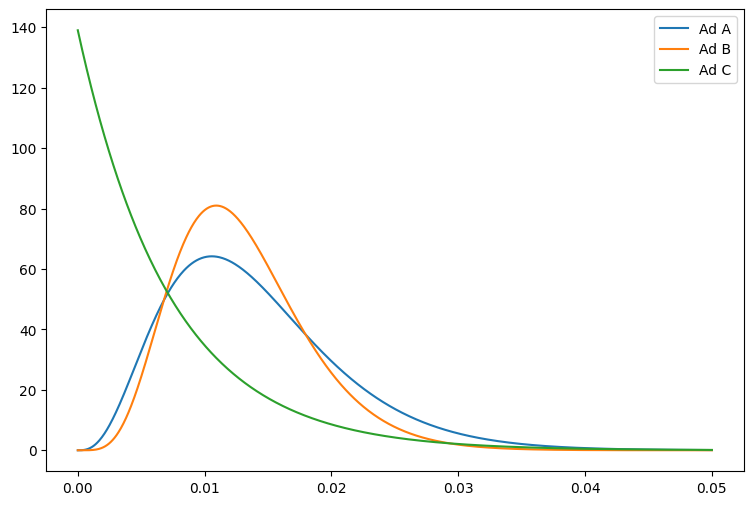

Press Enter to continue... 


n_trails 1000
total n 1881
[
  {
    "name": "A",
    "n_suc": 8,
    "n": 849,
    "p": 0.009422850412249705,
    "alpha": 9,
    "beta": 841
  },
  {
    "name": "B",
    "n_suc": 5,
    "n": 789,
    "p": 0.0063371356147021544,
    "alpha": 6,
    "beta": 784
  },
  {
    "name": "C",
    "n_suc": 0,
    "n": 245,
    "p": 0.0,
    "alpha": 1,
    "beta": 245
  }
]


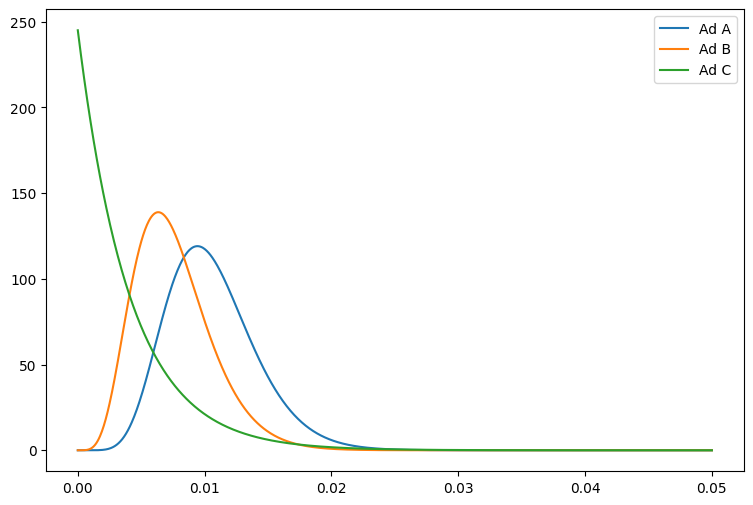

Press Enter to continue... 


n_trails 2000
total n 3881
[
  {
    "name": "A",
    "n_suc": 16,
    "n": 2369,
    "p": 0.006753904601097509,
    "alpha": 17,
    "beta": 2353
  },
  {
    "name": "B",
    "n_suc": 6,
    "n": 1155,
    "p": 0.005194805194805195,
    "alpha": 7,
    "beta": 1149
  },
  {
    "name": "C",
    "n_suc": 0,
    "n": 359,
    "p": 0.0,
    "alpha": 1,
    "beta": 359
  }
]


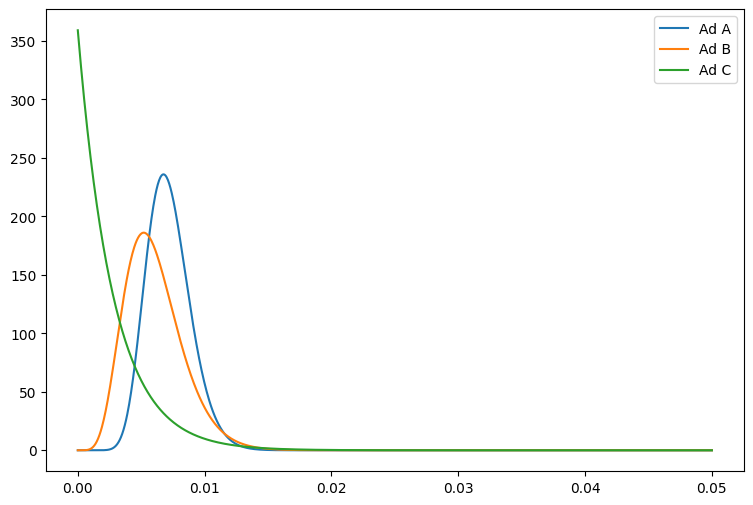

Press Enter to continue... 


n_trails 5000
total n 8881
[
  {
    "name": "A",
    "n_suc": 50,
    "n": 6426,
    "p": 0.00778089013383131,
    "alpha": 51,
    "beta": 6376
  },
  {
    "name": "B",
    "n_suc": 8,
    "n": 1927,
    "p": 0.0041515308770108976,
    "alpha": 9,
    "beta": 1919
  },
  {
    "name": "C",
    "n_suc": 0,
    "n": 530,
    "p": 0.0,
    "alpha": 1,
    "beta": 530
  }
]


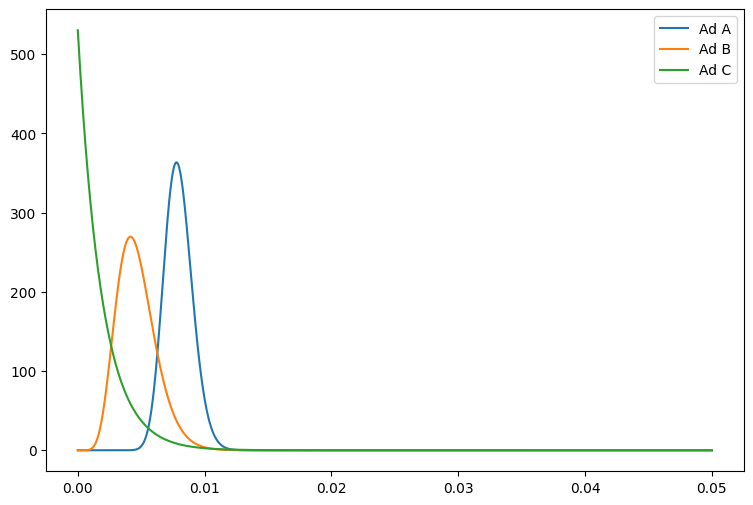

Press Enter to continue... 


n_trails 10000
total n 18881
[
  {
    "name": "A",
    "n_suc": 127,
    "n": 15713,
    "p": 0.008082479475593457,
    "alpha": 128,
    "beta": 15586
  },
  {
    "name": "B",
    "n_suc": 12,
    "n": 2537,
    "p": 0.004729996058336618,
    "alpha": 13,
    "beta": 2525
  },
  {
    "name": "C",
    "n_suc": 0,
    "n": 633,
    "p": 0.0,
    "alpha": 1,
    "beta": 633
  }
]


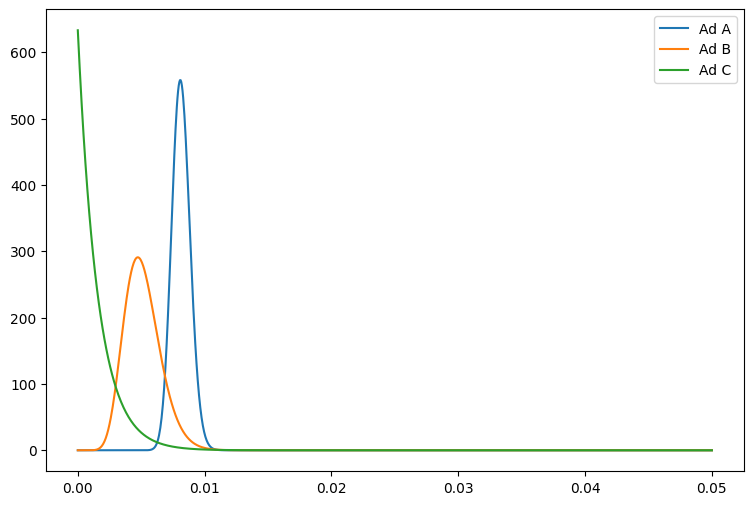

Press Enter to continue... 


n_trails 100000
total n 118881
[
  {
    "name": "A",
    "n_suc": 937,
    "n": 114106,
    "p": 0.00821166283981561,
    "alpha": 938,
    "beta": 113169
  },
  {
    "name": "B",
    "n_suc": 19,
    "n": 3958,
    "p": 0.004800404244567963,
    "alpha": 20,
    "beta": 3939
  },
  {
    "name": "C",
    "n_suc": 0,
    "n": 819,
    "p": 0.0,
    "alpha": 1,
    "beta": 819
  }
]


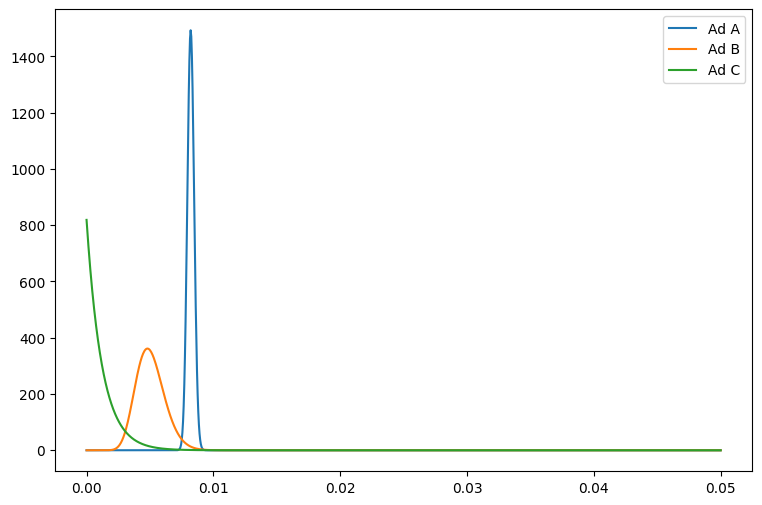

In [ ]:
for n_sub in [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 10**5]:
    print('n_trails', n_sub)
    experiment.run_trails(n_sub)
    experiment.plot_policy()
    input("Press Enter to continue...")